## **Import Statements**

In [34]:
import argparse
import pandas as pd
import os
from tqdm import tqdm as tqdm
import urllib.request
import numpy as np
import sys
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from keras.layers import Embedding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Reshape
from tensorflow.keras.layers import MultiHeadAttention
import cv2
from collections.abc import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

In [35]:
# %pip install opencv-python

## **Loading CSV File into Data Frame**

In [36]:
df= pd.read_csv('./real_and_fake.csv')

In [37]:
df

,file,type,split
0,train/real_video/0.mp4,real,train
1,train/attack/0.mp4,attack,train
2,train/real_video/1.mp4,real,train
3,train/attack/1.mp4,attack,train
4,train/real_video/2.mp4,real,train
...,...,...,...
155,test/attack/77.mp4,attack,test
156,test/real_video/78.mp4,real,test
157,test/attack/78.mp4,attack,test
158,test/real_video/79.mp4,real,test


## **Preprocessing for Train Dataset**

In [38]:
os.makedirs('./train_1')
os.makedirs('./train_1/real_image')
os.makedirs('./train_1/attack_image')

## **Capturing Video Frames**

In [39]:
file_list=[]
type_list=[]
for i in range(0,110):
        captured_frame= cv2.VideoCapture(df['file'].iloc[i])
        #ret- Boolean value for indicating success or failure for reading the frame
        ret, frame = captured_frame.read()
        while(captured_frame.isOpened()):
                if (ret != True):
                        break
                # storing the frames in a new folder named train_1
                else:
                        if(df['type'].iloc[i]=='attack'): 
                                filename ='./train_1/attack_image/' + str(i)+'.jpg'
                                file_list.append(filename)
                                type_list.append(0)
                        else:
                                filename ='./train_1/real_image/' + str(i)+'.jpg'
                                file_list.append(filename)
                                type_list.append(1)
                        cv2.imwrite(filename, frame)
                        captured_frame.release()


In [40]:
data={'file':file_list,
      'type':type_list}
df_train=pd.DataFrame(data)

In [41]:
df_train

,file,type
0,./train_1/real_image/0.jpg,1
1,./train_1/attack_image/1.jpg,0
2,./train_1/real_image/2.jpg,1
3,./train_1/attack_image/3.jpg,0
4,./train_1/real_image/4.jpg,1
...,...,...
105,./train_1/attack_image/105.jpg,0
106,./train_1/real_image/106.jpg,1
107,./train_1/attack_image/107.jpg,0
108,./train_1/real_image/108.jpg,1


## **Preprocessing for Test Dataset**

In [42]:
os.makedirs('./test_1')
os.makedirs('./test_1/real_image')
os.makedirs('./test_1/attack_image')

In [43]:
file_list_test=[]
type_list_test=[]
for i in range(111,160):
        captured_frame= cv2.VideoCapture(df['file'].iloc[i])
        #ret- Boolean value for indicating success or failure for reading the frame
        ret, frame = captured_frame.read()
        while(captured_frame.isOpened()):
                if (ret != True):
                        break
                # storing the frames in a new folder named train_1
                else:
                        if(df['type'].iloc[i]=='attack'): 
                                filename ='./test_1/attack_image/' + str(i)+'.jpg'
                                file_list_test.append(filename)
                                type_list_test.append(0)
                        else:
                                filename ='./test_1/real_image/' + str(i)+'.jpg'
                                file_list_test.append(filename)
                                type_list_test.append(1)
                        cv2.imwrite(filename, frame)
                        captured_frame.release()


In [44]:
data_test={'file':file_list_test,
      'type':type_list_test}
df_test=pd.DataFrame(data_test)

In [45]:
df_test

,file,type
0,./test_1/attack_image/111.jpg,0
1,./test_1/real_image/112.jpg,1
2,./test_1/attack_image/113.jpg,0
3,./test_1/real_image/114.jpg,1
4,./test_1/attack_image/115.jpg,0
5,./test_1/real_image/116.jpg,1
6,./test_1/attack_image/117.jpg,0
7,./test_1/real_image/118.jpg,1
8,./test_1/attack_image/119.jpg,0
9,./test_1/real_image/120.jpg,1


In [46]:
def load_image(image_path, target_size=(244, 244)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    return img

image_data = []
for index, row in df_train.iterrows():
    try:
        img_dir = row.loc['file']
        img = load_image(img_dir, target_size=(244, 244))
        image_data.append(img)
    except Exception as e:
        print(f"Error loading image {img_dir}: {str(e)}")

In [47]:
image_data

[array([[[[0.44313726, 0.4117647 , 0.36078432],
          [0.4117647 , 0.38039216, 0.32941177],
          [0.39215687, 0.3529412 , 0.30588236],
          ...,
          [0.3137255 , 0.32156864, 0.2784314 ],
          [0.29803923, 0.30588236, 0.2627451 ],
          [0.25882354, 0.26666668, 0.22352941]],
 
         [[0.40392157, 0.37254903, 0.32156864],
          [0.40784314, 0.3764706 , 0.3254902 ],
          [0.4117647 , 0.37254903, 0.3254902 ],
          ...,
          [0.29411766, 0.3019608 , 0.25882354],
          [0.28235295, 0.2901961 , 0.24705882],
          [0.2784314 , 0.28627452, 0.24313726]],
 
         [[0.5137255 , 0.48235294, 0.43137255],
          [0.49803922, 0.46666667, 0.41568628],
          [0.5058824 , 0.46666667, 0.41960785],
          ...,
          [0.30980393, 0.31764707, 0.27450982],
          [0.29803923, 0.30588236, 0.2627451 ],
          [0.22745098, 0.23529412, 0.19215687]],
 
         ...,
 
         [[0.5294118 , 0.2       , 0.05882353],
          [0.52549

In [48]:
image_data = np.vstack(image_data)

In [49]:
image_data_test = []
for index, row in df_test.iterrows():
    try:
        img_dir = row.loc['file']
        img = load_image(img_dir, target_size=(244, 244))
        image_data_test.append(img)
    except Exception as e:
        print(f"Error loading image {img_dir}: {str(e)}")

In [50]:
image_data_test

[array([[[[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         [[0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784]],
 
         ...,
 
         [[0.02745098, 0.00392157, 0.00392157],
          [0.02745

In [51]:
image_data_test = np.vstack(image_data_test)

In [52]:
y_train=to_categorical(df_train['type'], num_classes=2)
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [53]:
y_test=to_categorical(df_test['type'], num_classes=2)

In [54]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [55]:
# %pip install -U tensorflow-addons

## **Functions for Confusion Matrix and ROC Curve**

In [56]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

target = encode_text_index(df,'type')

## **Hyperparameters Configuration**

In [57]:
learning_rate = 0.0001
weight_decay = 0.0001
batch_size = 32
num_epochs = 30
image_size = 224  # We'll resize input images to this size
patch_size = 32 # Size of the patches to be extract from the input images
patches_count = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

## **Building Vision Transformer Model**

In [58]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(image_data)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    
class PatchEncoder(layers.Layer):
    def __init__(self, patches_count, projection_dim):
        super().__init__()
        self.patches_count = patches_count
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=patches_count, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.patches_count, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def vit_classifier():
    inputs = layers.Input(shape=image_data.shape[1:])
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(patches_count, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(2, activation="softmax")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

## **Compile, Train and Evaluate the Model**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches (Patches)              (None, None, 3072)   0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 49, 64)       199808      ['patches[0][0]']            

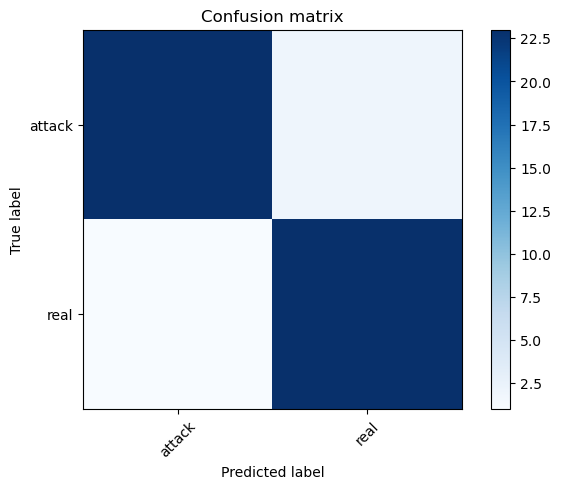

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.92      0.96      0.94        24

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49

2/2 [==============================] - 0s 55ms/step


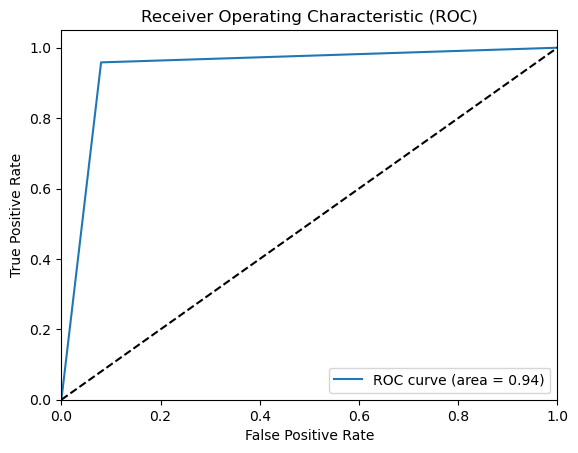

In [59]:
def Compile_model(model):
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    history = model.fit(
        x=image_data,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        callbacks=[monitor],
        validation_data=(image_data_test, y_test)
    )
    
    # Get the predicted labels for the test data
    y_pred = model.predict(image_data_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test,axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, target)
    plt.show()
    
    print(classification_report(df_test['type'], y_pred))

    pred = model.predict(image_data_test)
    pred = pred[:,1] # Only positive class (M)
    plot_roc(y_pred,df_test['type'])

    return history


vit_classifier = vit_classifier()
history = Compile_model(vit_classifier)